
#  PREDICTIVE DATA ANALYSIS OF EMPLOYEE ATTRITION PROBLEM

# dataset description

the dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv = 1000000 x 8

Columns Provided in the Dataset

1)jobId - Unique ID that indicates the employee

2)companyId - Unique ID that idicates the company

3)jobType - Shows which post the employee is working for the company

4)degree - shows which degree is completed by the employee

5)major - shows the field in which the employee is specialised in

6)industry - show the industry in which the employee is working

7)yearsExperience - years of working experience the employee is having

8)milesFromMetropolis - distance in miles between the comapny and his house

9)salary - salary given to the employee. 

eg. 250 indicates 2,50,000 in dollars



In [2]:
#import all necessory libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [3]:
#import datasets
train_data =pd.read_csv("C:\\Users\\nikhil\\Downloads\\train_dataset.csv")
train_data_salaries = pd.read_csv("C:\\Users\\nikhil\\Downloads\\train_salaries.csv")
test_data = pd.read_csv("C:\\Users\\nikhil\\Downloads\\test_dataset.csv")

In [4]:
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [5]:
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [6]:
test_data.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [7]:
train_data=pd.merge(train_data,train_data_salaries,on='jobId')
train_data

jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[1000000 rows x 9 columns]

In [8]:
train_data=train_data[train_data['salary']>30]
train_data
#we removed some rows because salary can not be less than 30 thousand it is human error or wrong data entry

jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[997548 rows x 9 columns]

# BASIC EDA

In [9]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [12]:
train_data.describe()

yearsExperience  milesFromMetropolis         salary
count    997548.000000        997548.000000  997548.000000
mean         12.015214            49.458372     116.280462
std           7.204992            28.863518      38.512936
min           0.000000             0.000000      31.000000
25%           6.000000            24.000000      89.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     301.000000

In [13]:
test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

In [14]:
print('train data length :',len(train_data))
print('test data length :',len(test_data))

train data length : 997548
test data length : 1000000


In [15]:
#get unique value from training dataset
for x in train_data.columns:
    print(x,':',len(train_data[x].unique()))

jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [16]:
unique=test_data.nunique()
unique

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [17]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [18]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [19]:
train_data= train_data.drop(['jobId','companyId'],axis=1)
train_data

jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH               10   
1                  CEO  HIGH_SCHOOL       NONE        WEB                3   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH               10   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO                8   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE                8   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH               19   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE               12   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION               16   
999998             CFO      MASTERS       NONE     HEALTH                6   
999999          JUNIOR    BACHELORS       NONE  EDUCATION               20   

        milesFromMetropolis  salary  
0                        83     130  
1                        73     101  
2                        38     137  
3                        17     142  
4                        16     163  
...                     ...     ...  
999995                   94      88  
999996                   35     160  
999997                   81      64  
999998                    5     149  
999999                   11      88  

[997548 rows x 7 columns]

In [20]:
test_data= test_data.drop(['jobId','companyId'],axis=1)
test_data

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [21]:
#now check categorical columns bcoz we have more object variables than int
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for x in train_data.columns:
    if train_data[x].dtype=='object':
        categorical_list.append(x)
    elif train_data[x].dtype=='int64':
        var_list.append(x)
    elif train_data[x].dtype=='float64':
        var_list.append(x)

In [22]:
categorical_list

['jobType', 'degree', 'major', 'industry']

In [23]:
var_list

['yearsExperience', 'milesFromMetropolis', 'salary']

# Correlation Matrix
why = A correlation matrix is a table showing correlation coefficients between variables.

There are three broad reasons for computing a correlation matrix:
    
1)To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.

2)To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.

3)As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [25]:
#correlation matrix of var list
#A correlation matrix is a table showing correlation coefficients between variables.
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

observations

1)yearsExperience and salary are positively correlated.

2)yearsExperience and milesFromMetropolis have no correlation.

3)milesFromMetropolis and salary are weakly negatively correlated.

#corelation matrix using seaborn
ax = sns.heatmap(
    corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation= 45,
    horizontalalignment='right'
);

# chi-square test
1) The Chi Square statistic is commonly used for testing relationships between categorical variables.

2) The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3)Example: Is there any significant relationship between gender and education qualification?

4)The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5)Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6)Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7)The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8) This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9)To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1)Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2)Interpret the key results for Chi-Square Test for Association

      Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.

In [24]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    #contigency table
    contigency_table =pd.crosstab(train_data[var_1],train_data[var_2])
    #observed values
    observed_values = contigency_table.values
    #expected value
    b =chi2_contingency(contigency_table)
    expected_values= b[3]
    #degree of freedom
    no_of_rows = len(contigency_table.iloc[0:,0])
    no_of_columns= len(contigency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("degree of freedom:",degree_f)
    #significance level 5%
    alpha = 0.05
    print("significance level:",alpha)
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi square statistic:",chi_square_statistic)
    #critical value
    critical_value =chi2.ppf(q=1-alpha,df=degree_f)
    print('critical value:',critical_value)
    #p value
    p_value= 1-chi2.cdf(x=chi_square_statistic,df=degree_f)
    print('p value:',p_value)
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [25]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

degree of freedom: 28
significance level: 0.05
chi square statistic: 49153.86411257831
critical value: 41.33713815142739
p value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

degree of freedom: 56
significance level: 0.05
chi square statistic: 16381.915810303108
critical value: 74.46832415930936
p value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

degree of freedom: 42
significance level: 0.05
chi square statistic: 100.30610291761408
critical value: 58.12403768086803
p value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 categorica


From above chi-square test:

correlated variables:

1)jobtype and degree

2)jobtype and major

3)degree and major


# scatter plot
1)A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2)The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3)Scatter plot's are used to observe and show relationships between two numeric variables.



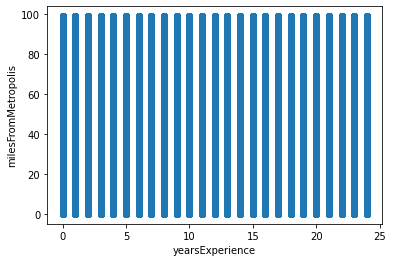

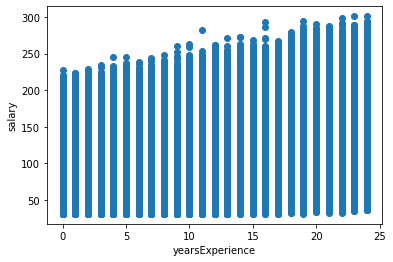

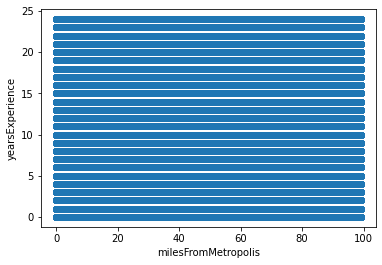

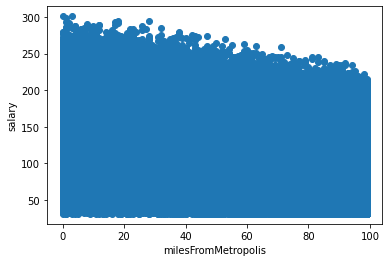

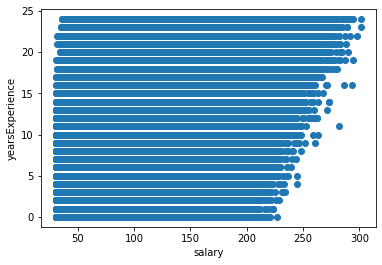

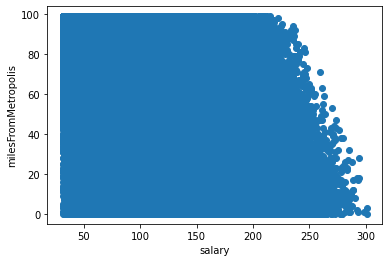

In [26]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
    plt.show()
# Loop through the different columns 
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)    

From above scatter plot

1)Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2)Increase in value on milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

3)There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

# Histogram
1)A histogram is an approximate representation of the distribution of numerical data.

2)To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3)The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

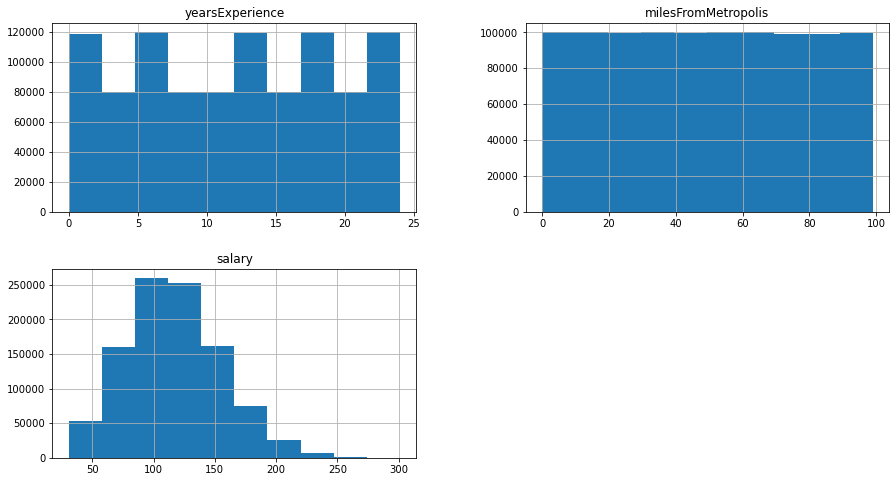

In [27]:
train_data.hist(figsize=(15,8))

From the above histogram


milesFromMetropolis data distribution is symmetric.

salary data distribution is symmetric, unimodel (it has only one peak in distribution)

# Box Plot
A boxplot is a standardized way of displaying the dataset based on a five-number summary:

1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

3. Median (Q2 or 50th percentile): the middle value of the dataset.

4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<AxesSubplot:>

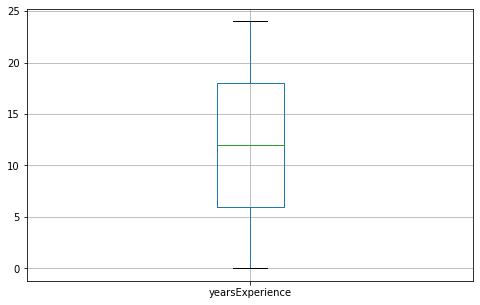

In [28]:
# box plot using pandas 
# box plot for yearsExperience column
train_data.boxplot(column='yearsExperience',figsize=(8,5))

from above box plot graph:

yearsExperience

25% of employees from dataset has yearExperience of between range 0 to 6.

25% of employee has yearExperience between range 6 to 12.

25% of employee has yearExperience between range 12 to 18.

25% of employee has yearExperience between range 18 to 24


<AxesSubplot:>

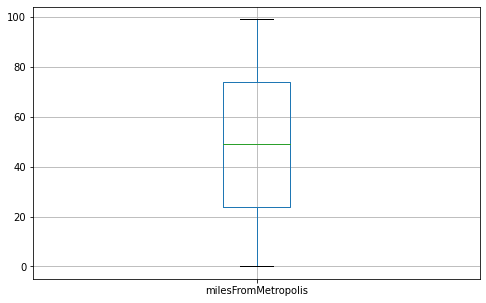

In [29]:
# box plot for  milesFromMetropolis column
train_data.boxplot(column='milesFromMetropolis',figsize=(8,5))

from above box plot graph:

milesfrom metropolis

1)25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.

2)25% of employee has value of milesFromMetropolis between range 24 to 52

3)25% of employee has value of milesFromMetropolis between range 52 to 76.

4)25% of employee has value of milesFromMetropolis between range 76 to 100



<AxesSubplot:>

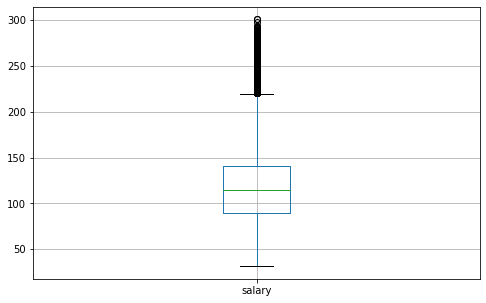

In [30]:
#boxplot for salary column
train_data.boxplot(column='salary',figsize=(8,5))

from above box plot graph:


1)25% of employees from dataset has value of salary between range 0 to 88.

2)25% of employee has value of salary between range 88 to 120.

3)25% of employee has value of salary between range 120 to 150.

4)25% of employee has value of salary between range 150 to 300

The mean salary is around 120


# Violin Plot

1)A violin plot is a method of plotting numeric data.

2)Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3)It has:

     1)Median (a white dot on the violin plot)
        
     2)Interquartile range (the black bar in the center of violin)
    
     3)The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

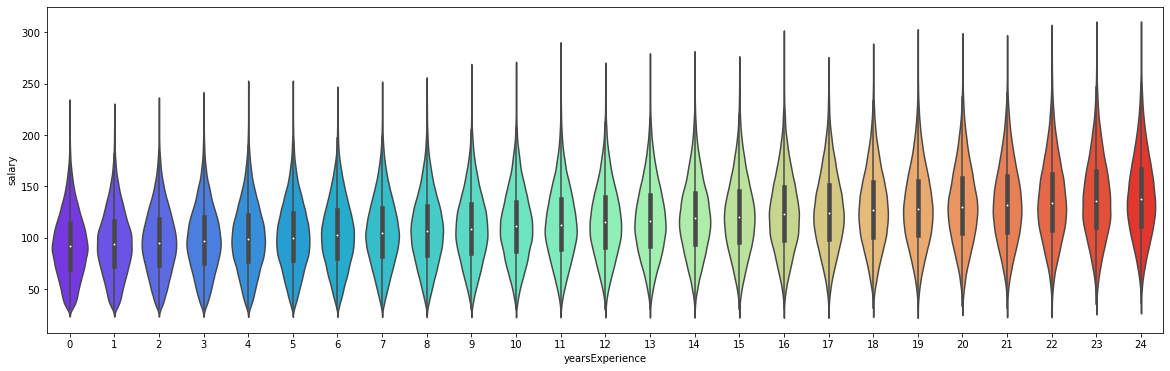

In [31]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary',data=train_data, palette='rainbow')



from above violin plot:

1)The distribution between lower adjacent value and upper adjacent value is symmetrical.

2)also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.

3)The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

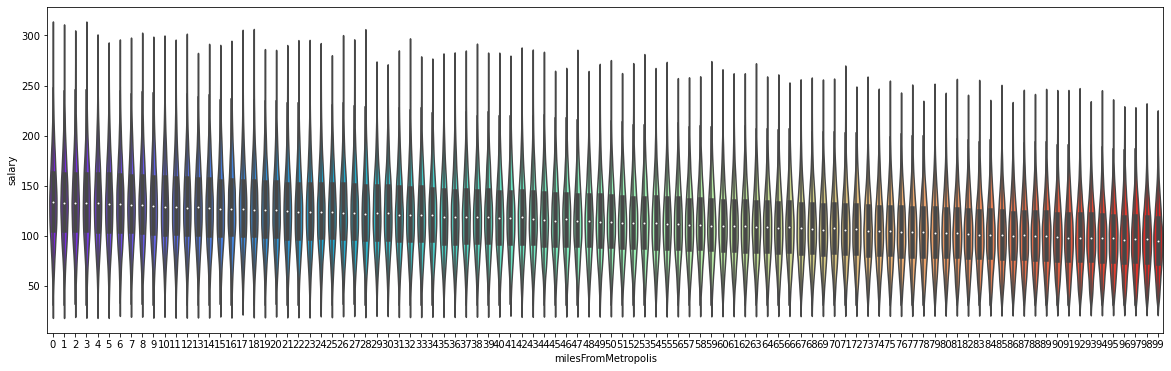

In [32]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data, palette='rainbow')


from above violin plot:

1)The distribution between lower adjacent value and upper adjacent value is symmetrical.

2)also there is higher observation probability at the between first quartile and third quartile.

3)The salary range is decreasing as we move right on the axis of milesFromMetropolis



# Boxenplot
1)The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2)The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3)By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

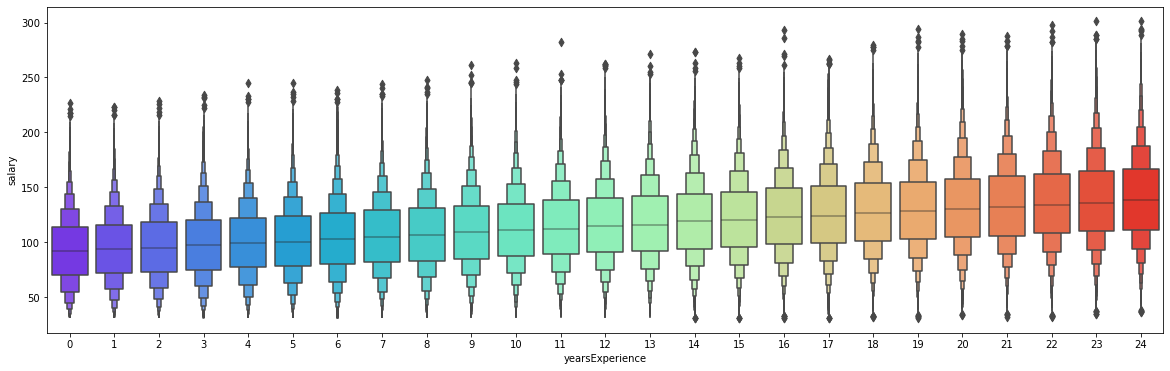

In [33]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data, palette='rainbow')

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

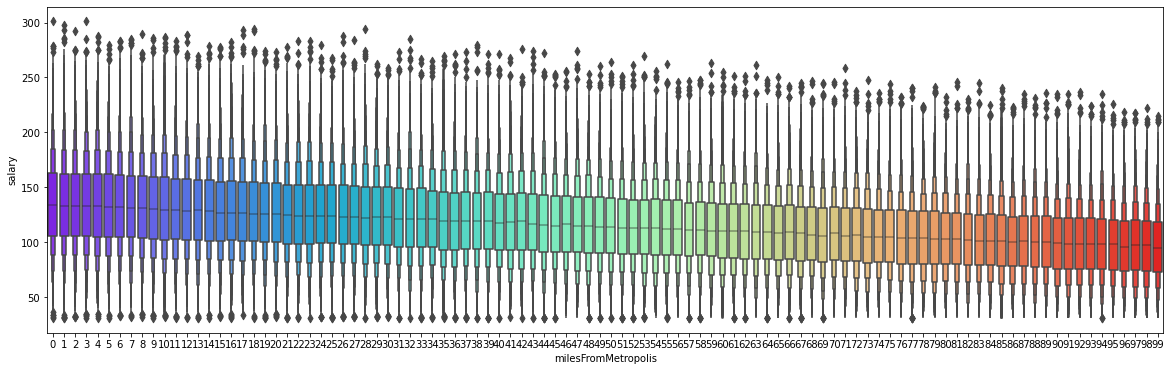

In [34]:
# boxen plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis',y='salary',data=train_data, palette='rainbow')

# Count Plot
1)A countplot is kind of like a histogram or a bar graph for some categorical area.

2)It simply shows the number of occurrences of an item based on a certain type of category.

<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

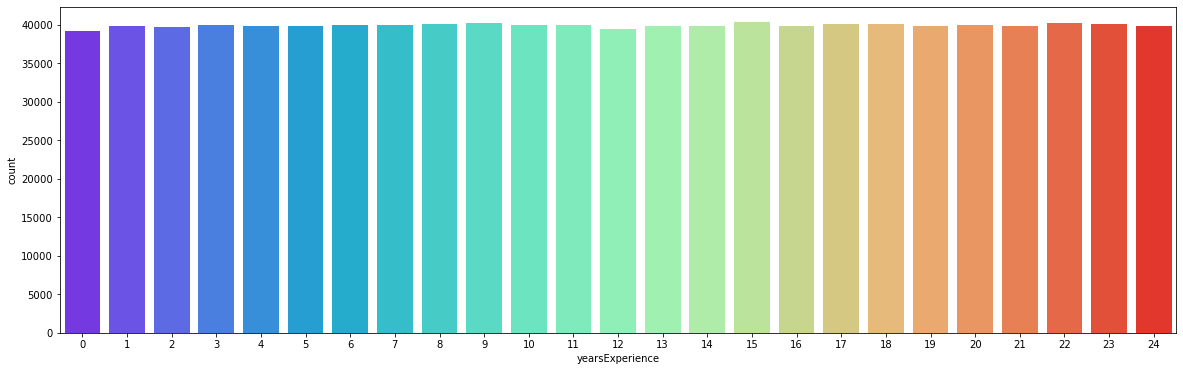

In [35]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience', data=train_data, palette='rainbow')




From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.




<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

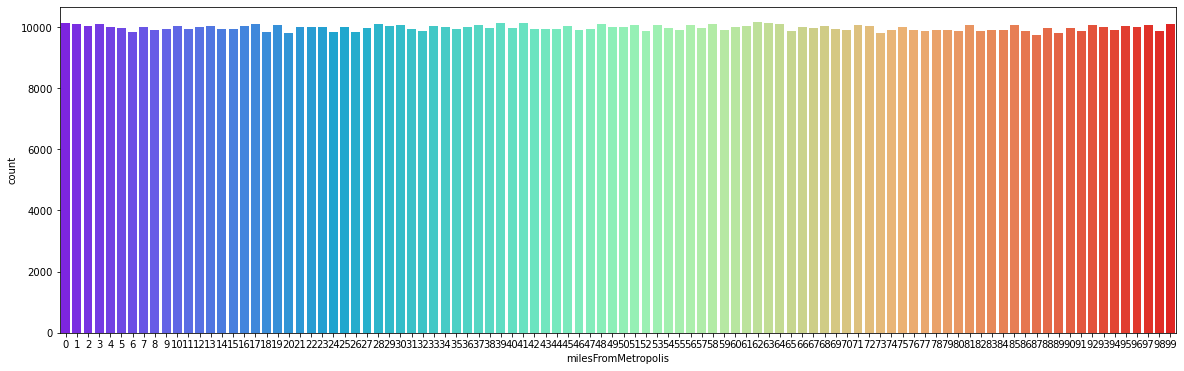

In [36]:
# count plot of whole datset based on miles from metropolis
plt.figure(figsize=(20,6))
sns.countplot(x='milesFromMetropolis', data=train_data, palette='rainbow')


From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

# Swarm Plot
1)The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2)Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

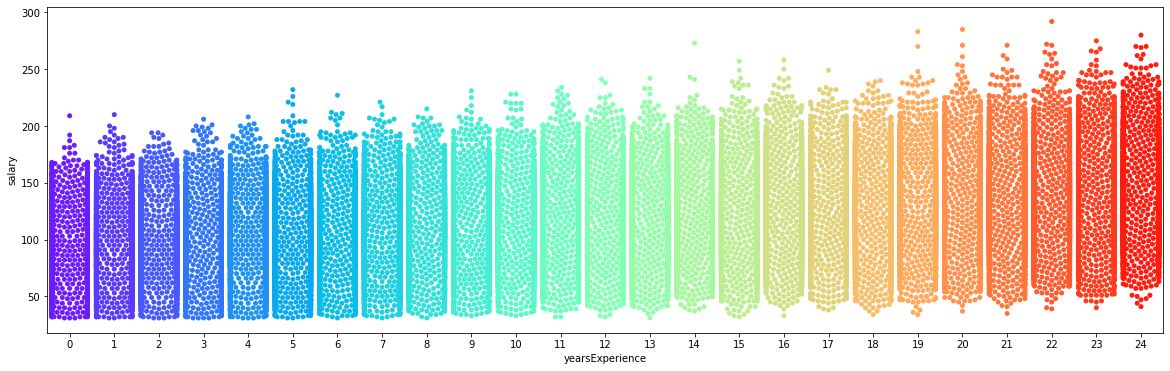

In [37]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000], palette='rainbow')


from above combine plot:

1)The distribution between lower adjacent value and upper adjacent value is symmetrical.

2)also there is higher observation probability at the between first quartile and third quartile.

3)The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

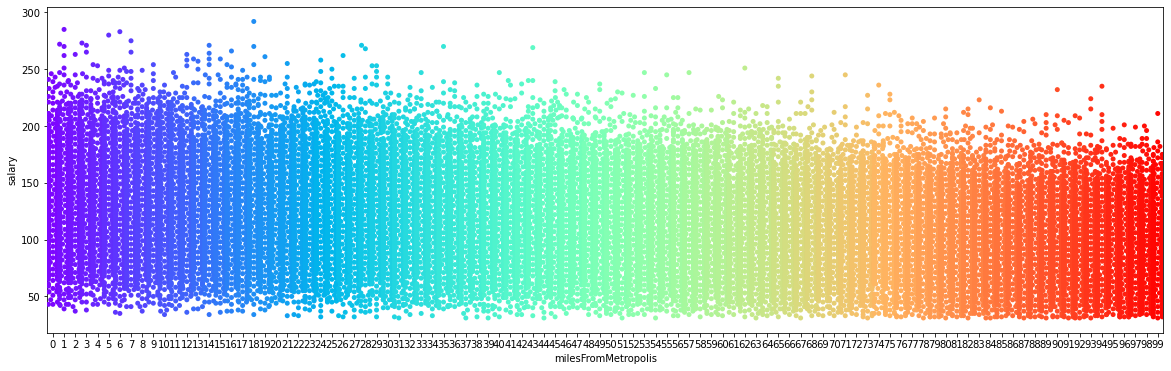

In [38]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000], palette='rainbow')

# Combine plot
Combination of boxenplot and swarm plot

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

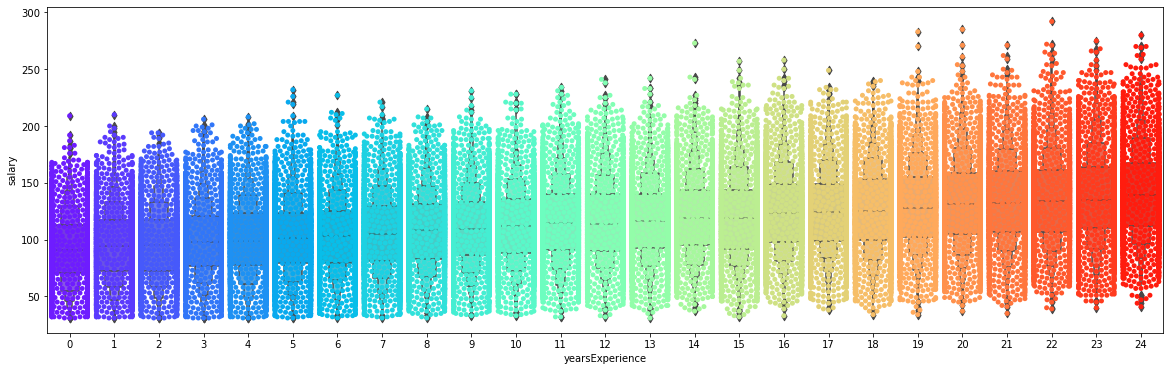

In [39]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000], palette='rainbow')
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000], palette='rainbow')

from above combine plot:

1)The distribution between lower adjacent value and upper adjacent value is symmetrical.

2)also there is higher observation probability at the between first quartile and third quartile.

3)The salary range is increasing as we move right on the axis of yearExperience



<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

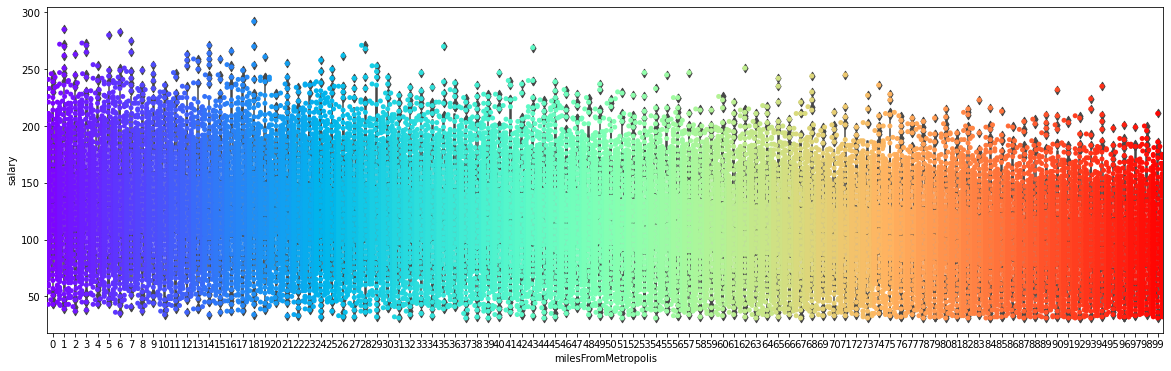

In [40]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000], palette='rainbow')
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000], palette='rainbow')

# Strip Plot
A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

1. Horizontal axis = the value of the response variable;
2. Verticalal axis = all values are set to 1.
That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).




<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

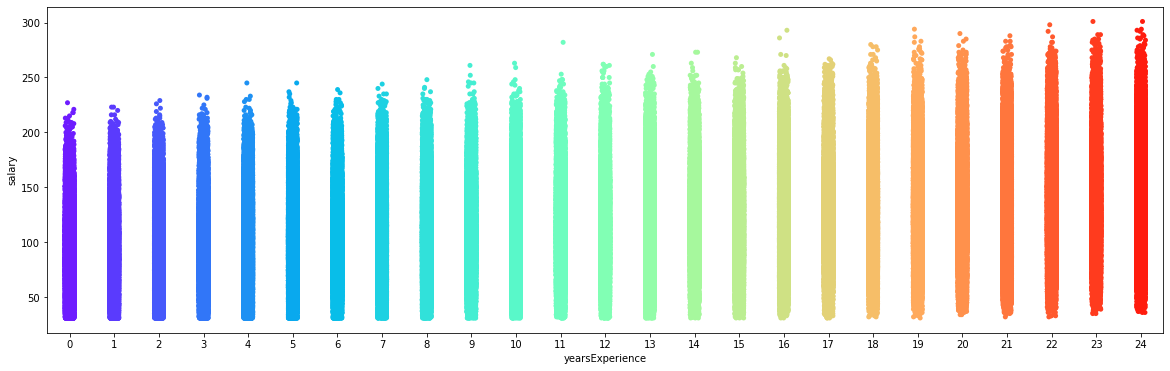

In [41]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience',y='salary', data=train_data, palette='rainbow')



from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

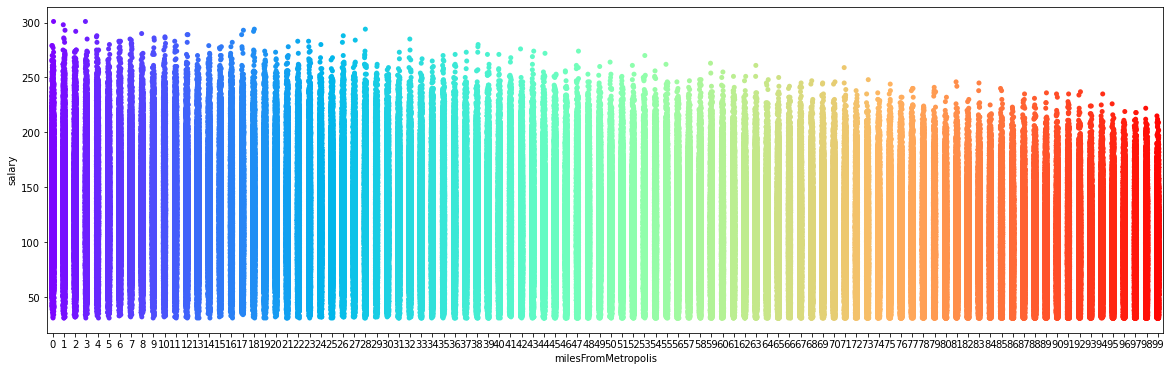

In [42]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis',y='salary',data=train_data, palette='rainbow')

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis



# Variance inflation factor (VIF)

1)The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.

2)It is used for diagnosing collinearity/multicollinearity.

3)Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [43]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [44]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'],axis=1)


# target values
target =train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [45]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
    y = train_for_vif.loc[:,train_for_vif.columns==names[i]]
  # taking all other remaining columns as fetaure variable
    x = train_for_vif.loc[:,train_for_vif.columns!=names[i]] 
  # firting the OLS model on y and x
    model = sm.OLS(y,x)
    result = model.fit()
  # geting the r^2 value of results.
    rsq = result.rsquared
  # calculating vif value
    vif = round(1/(1-rsq),2)
    print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
    print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

1)yearsExperience and milesFromMetropolis both have colinearity with all the variables.


# ANOVA Test
Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

Homogeneity of variance Assumption Check

Hypothesis Testing

According to five steps process of hypothesis testing: H₀: μ₁= μ₂ = μ₃ = … = μ₆ H₁: Not all salary means are equal α = 0.05 According to F test statistics:



In [46]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
    train_anova = train_data[[x,y]]
    groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
    print(groups)


    unique_majors = train_anova[x].unique()
    for major in unique_majors:
        stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
        plt.title("Probability Plot - " +  str(major))
        plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
    ratio =train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
    print(ratio)


  # Create ANOVA backbone table
    data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
    anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
    anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
    x_bar = train_anova[y].mean()
    SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
    SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
    anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
    SSTR = SSTR[y].sum() + SSE[y].sum()
    anova_table['SS']['Total'] = SSTR

  # update degree of freedom
    anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F
    # p-value
    anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
    alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
    tail_hypothesis_type = "two-tailed"
    if tail_hypothesis_type == "two-tailed":
        alpha /= 2
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
    print(anova_table)


  # The p-value approach
    print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis."
    if anova_table['P-value']['Between Groups'] <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
    print(conclusion)
      
  # The critical value approach
   # print("\n--------------------------------------------------------------------------------------")
   # print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
   # conclusion = "Failed to reject the null hypothesis."
   # if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
       # conclusion = "Null Hypothesis is rejected."
   # print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
    #print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


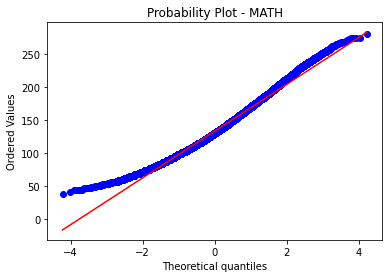

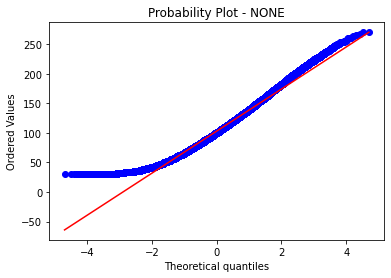

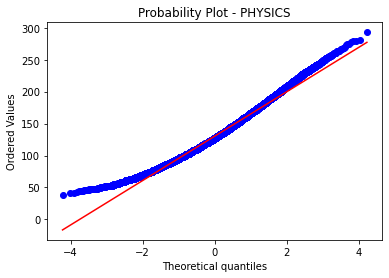

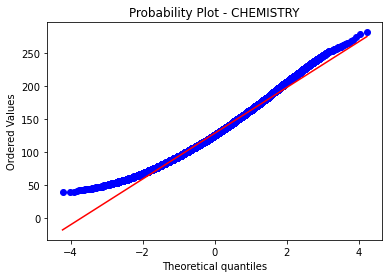

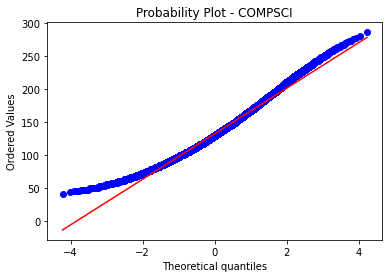

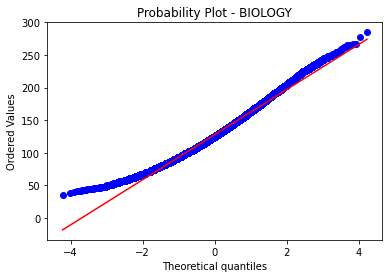

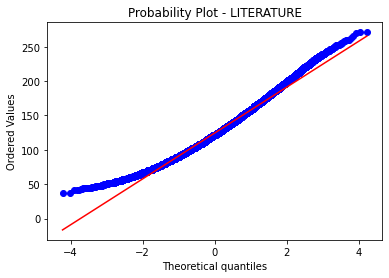

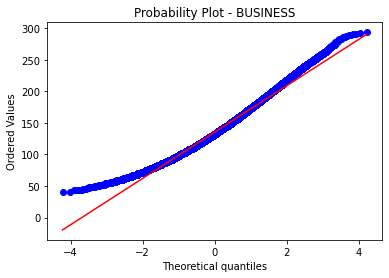

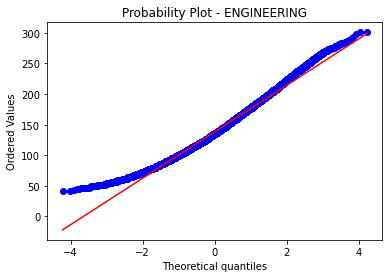

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.


In [47]:
perform_anova_test('major','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


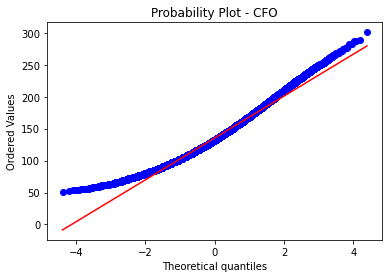

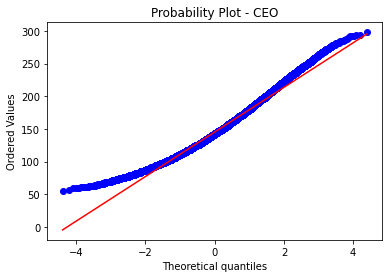

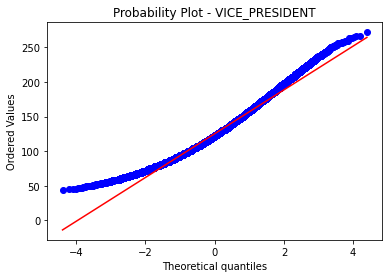

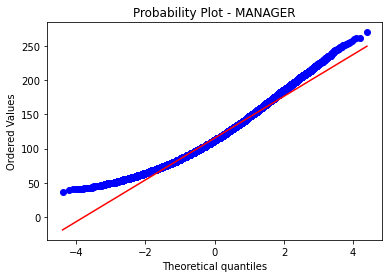

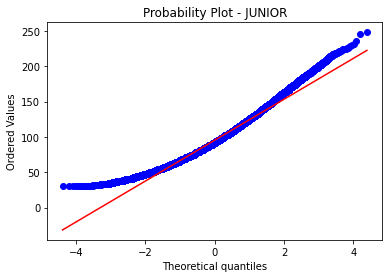

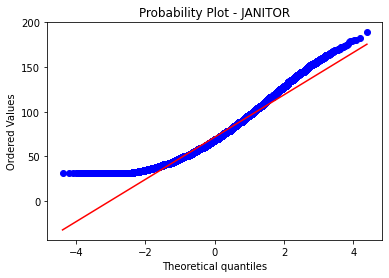

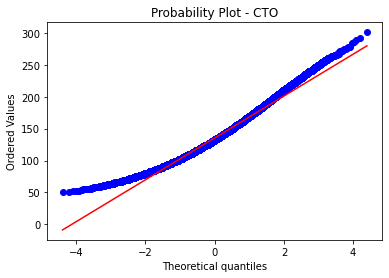

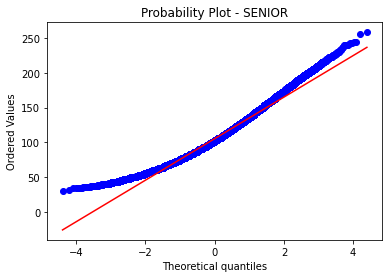

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.


In [48]:
perform_anova_test('jobType','salary')

    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


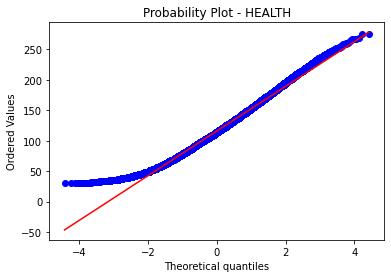

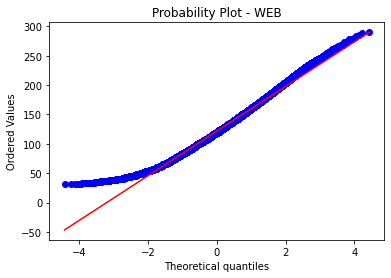

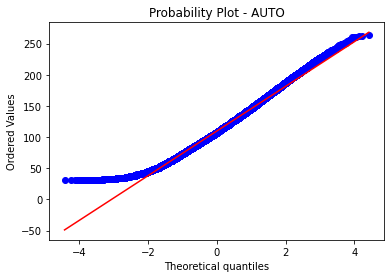

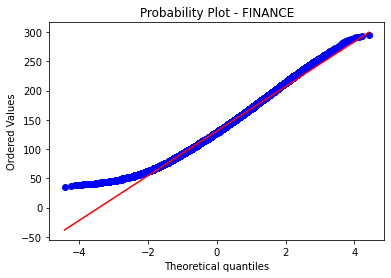

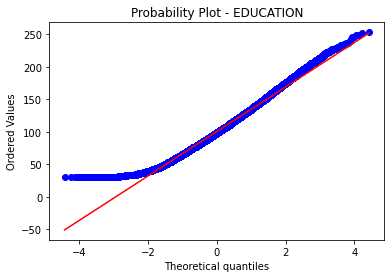

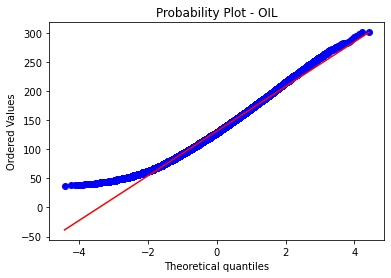

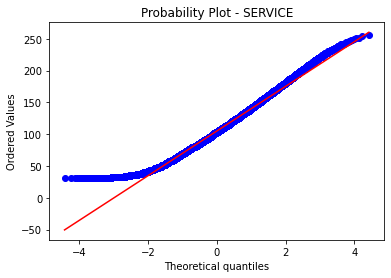

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.


In [49]:
perform_anova_test('industry','salary')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234


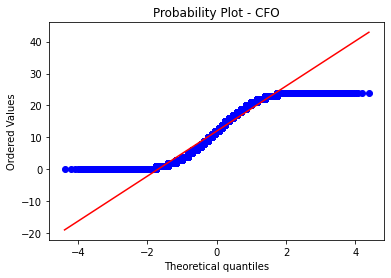

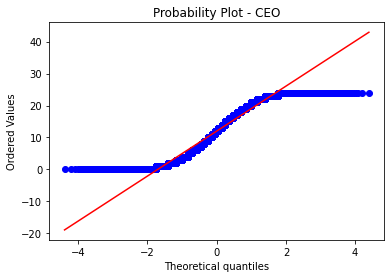

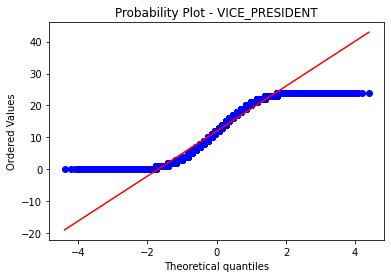

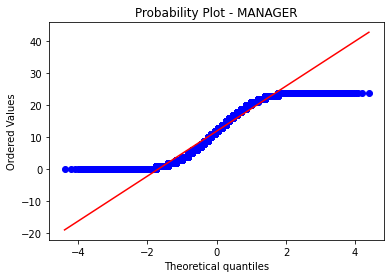

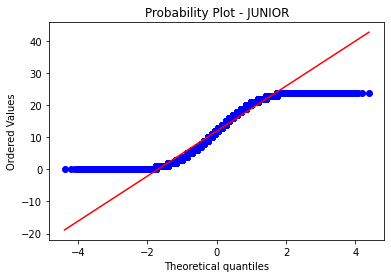

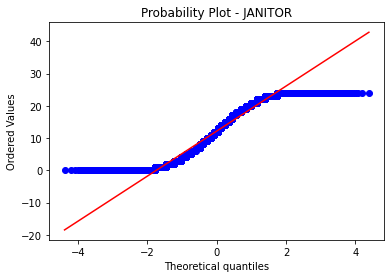

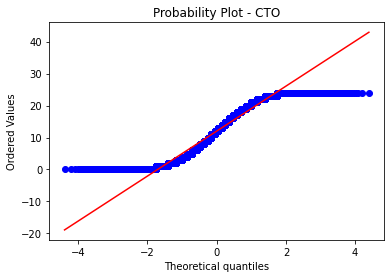

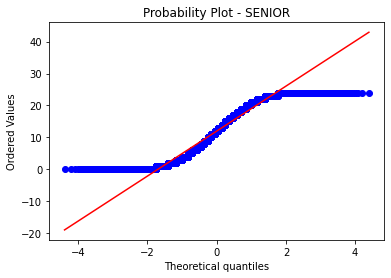

yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and p value is: 9.905482767358365e-09
Null Hypothesis is rejected.


In [50]:
perform_anova_test('jobType','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


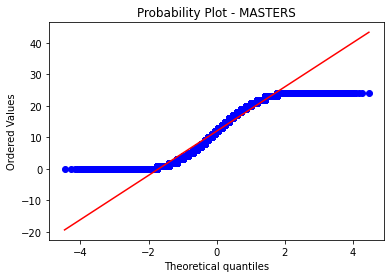

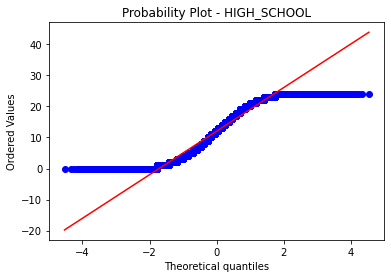

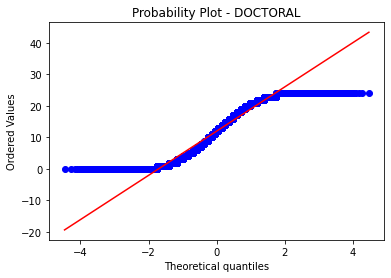

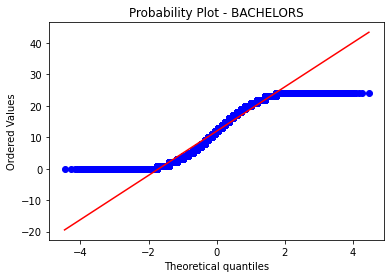

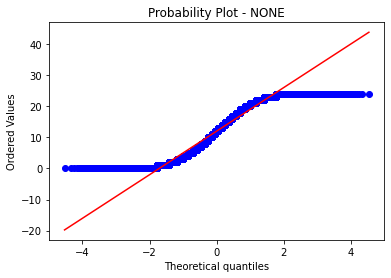

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.


In [51]:
perform_anova_test('degree','yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


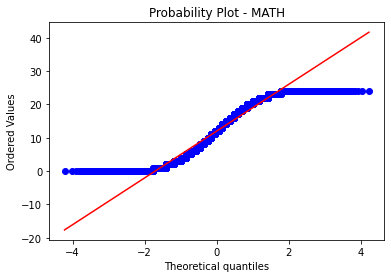

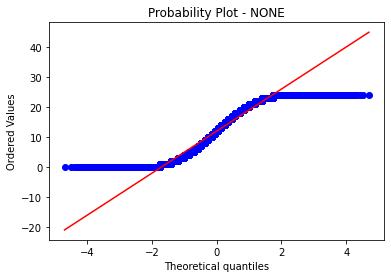

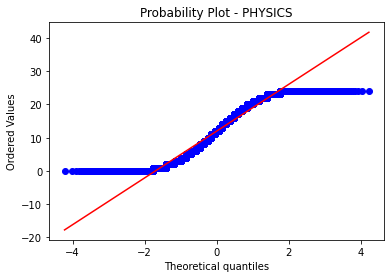

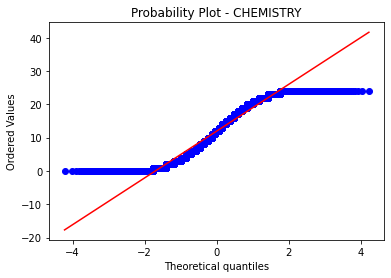

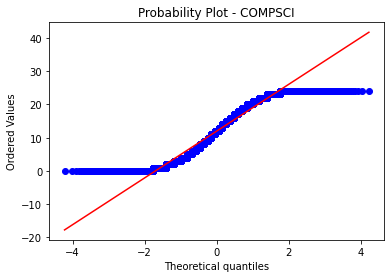

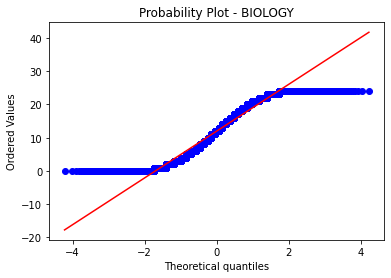

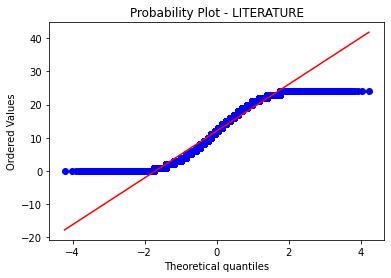

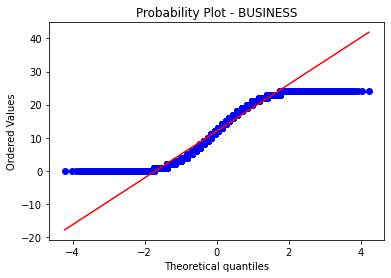

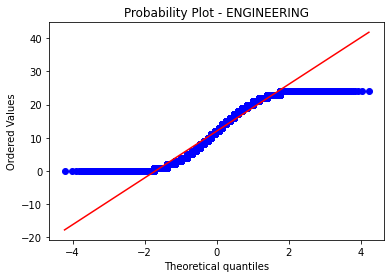

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and p value is: 0.2073404736822877
Failed to reject the null hypothesis.


In [52]:
perform_anova_test('major','yearsExperience')

    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


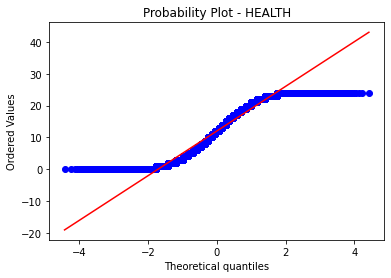

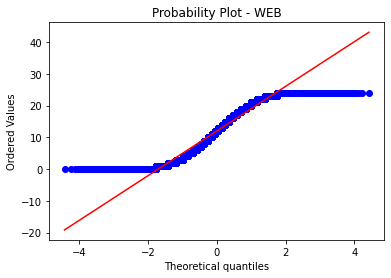

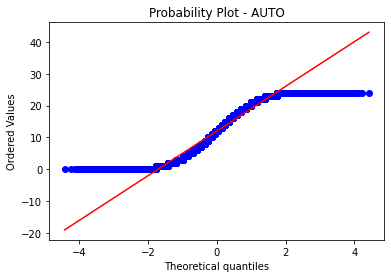

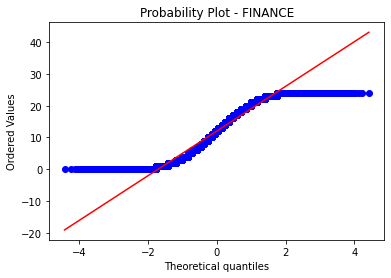

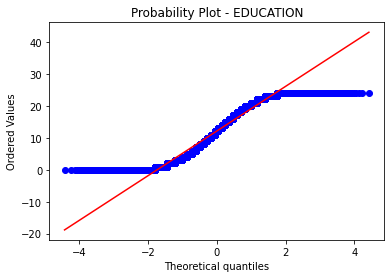

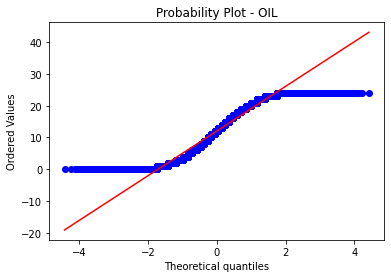

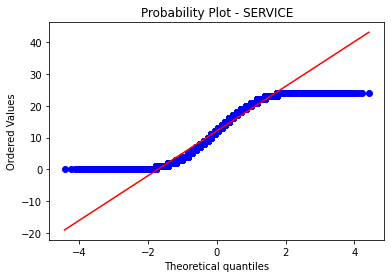

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypothesis is rejected.


In [53]:
perform_anova_test('industry','yearsExperience')

# Dendrogram
The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.



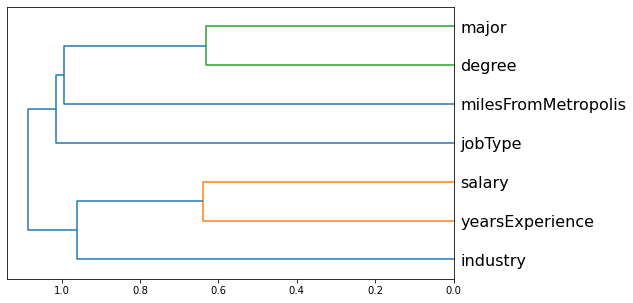

In [54]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]



import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(8,5))
dendrogram =hc.dendrogram(z , labels= X.columns, orientation='left', leaf_font_size= 16)
plt.show()


observation from dendrogram

Strongly correlated variables:

1)major and degree

2)salary and yearsExperience

# Since, there are no missing values and all the data are distributed equally. We can start converting the categorical values to numerical.

# Scaling

Why scaling is necessary?

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units.

The results would vary greatly between different units, 5kg and 5000gms.

The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [55]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
    scaler = MinMaxScaler()

    df[col] = scaler.fit_transform(df[col])
    return df

In [56]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)



# Modelling

One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.



In [57]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [58]:
# Split the labels and the target
train_X = train_data.drop(['salary','yearsExperience','milesFromMetropolis'],axis=1)
train_Y = train_data['salary']

In [59]:
#features
train_X.head()

jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [60]:
#target
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [61]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X =  train_X.join(train_data['milesFromMetropolis'])
train_X.head()



jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [62]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_Y,test_size=0.2)

In [63]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())
    
    


# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
          m.score(X_train,Y_train),m.score(X_test,Y_test),
          median_absolute_error(m.predict(X_train),Y_train),median_absolute_error(m.predict(X_test),Y_test),
          metrics.mean_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test),
          ]

    
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [64]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df =pd.DataFrame() 

    _df = pd.DataFrame()
    _df['feature_importance'] =feature_importances 
    _df['column'] = feat_train_df.columns
    feature_importance_df =pd.concat([feature_importance_df,_df],
                                    axis=0,ignore_index=True) 
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance',ascending=False).index[:50]    
    


    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                 x='feature_importance',
                 y='column',
                 order=order,
                 ax=ax,
                 palette='viridis',
                 orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax
    return fig, ax

RMSE-Train: 19.636870961391462
RMSE-Test: 19.587454105309757
Score-Train: 0.7402227758120434
Score-Test: 0.7405406761597123
MedAE-Train: 13.772705078125
MedAE-Test: 13.724365234375
MeanAE-Train: 15.878851415200272
MeanAE-Test: 15.835111808843777 

Wall time: 1.84 s


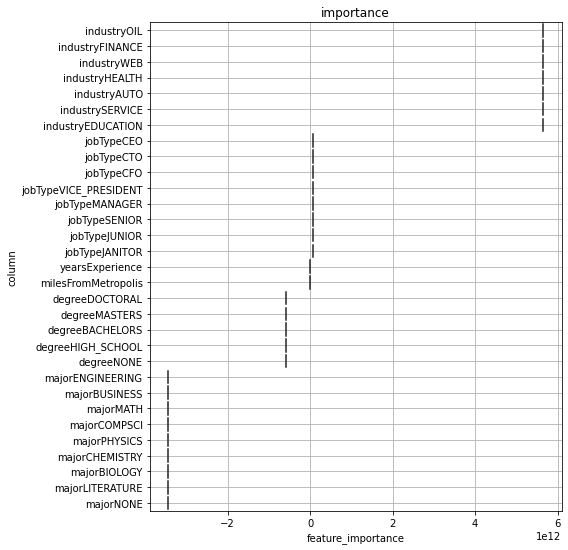

In [65]:
%%time
# Fit a Linear Regression model to the train dataset
# Import LinearRegressor
from sklearn.linear_model import LinearRegression
# Instantiate the model
lModel =LinearRegression()
 # Fit the model to the data
lModel.fit(X_train,Y_train)
# print score of the model
print_score(lModel)
# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_,train_X)

# Random Forest Regressor
Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 10.499287693290682
RMSE-Test: 21.031471036832105
Score-Train: 0.9257363703728512
Score-Test: 0.7008750777508089
MedAE-Train: 6.484841269841283
MedAE-Test: 14.069999999999993
MeanAE-Train: 8.071675244947647
MeanAE-Test: 16.741962229281153 

Wall time: 9min 42s


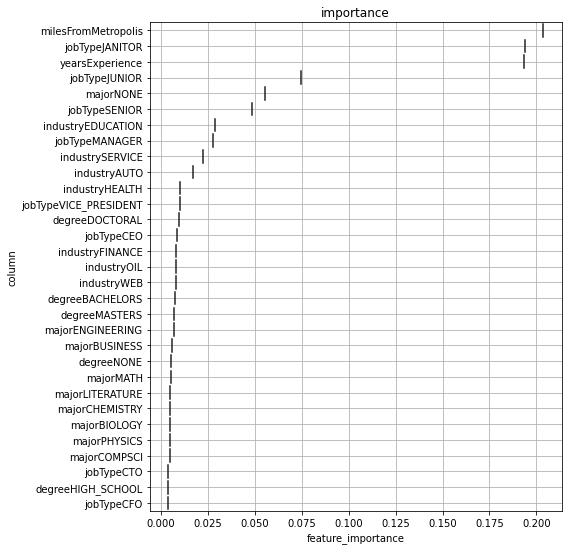

In [66]:
%%time
# Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
rf= RandomForestRegressor()
# Fit the model to the data
rf.fit(X_train,Y_train)
# print score of the model
print_score(rf)
# visualizing the inportance of features.
fig, ax =visualize_importance(rf.feature_importances_,train_X) 

# Gradient Boosting Regressor
Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 19.395653468354563
RMSE-Test: 19.382470895699576
Score-Train: 0.7465657353217263
Score-Test: 0.7459427579724462
MedAE-Train: 13.667976910519087
MedAE-Test: 13.637007739597458
MeanAE-Train: 15.682993998432107
MeanAE-Test: 15.661671977717232 

Wall time: 1min 58s


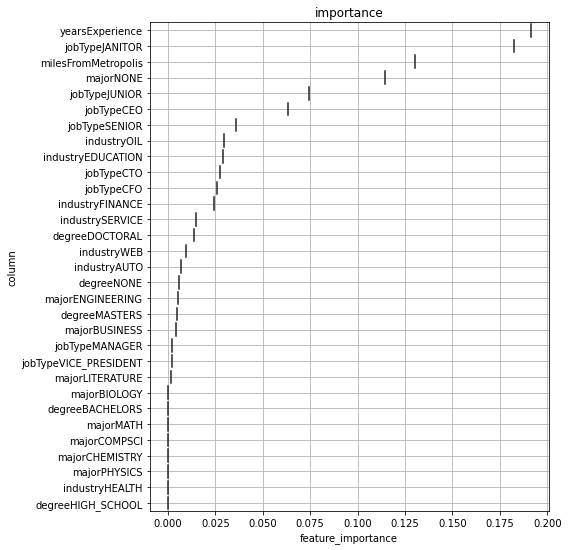

In [67]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model
GBR = GradientBoostingRegressor() 
GBR.fit(X_train,Y_train)
# print score of the model
print_score(GBR)
# visualizing the inportance of features.
fig, ax =visualize_importance(GBR.feature_importances_,train_X) 

# DecisionTree Regressor
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

RMSE-Train: 8.36170698891339
RMSE-Test: 26.260833295543993
Score-Train: 0.9528972363442766
Score-Test: 0.5336303245345548
MedAE-Train: 0.0
MedAE-Test: 16.0
MeanAE-Train: 4.204647132662841
MeanAE-Test: 20.364591856650524 

Wall time: 7.27 s


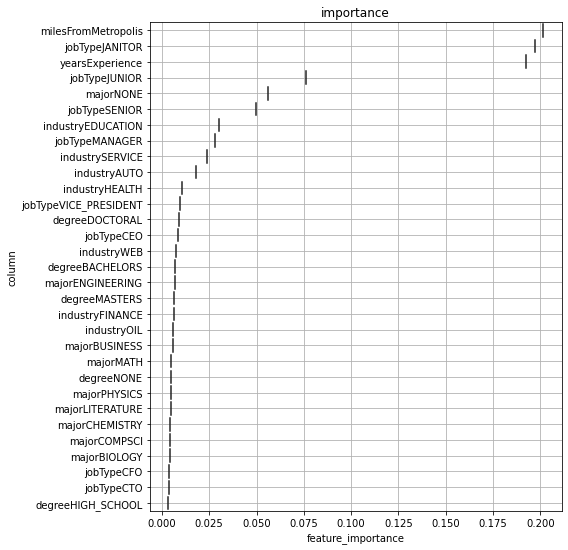

In [68]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
DTR = DecisionTreeRegressor()
# Instantiate the model
DTR.fit(X_train,Y_train)
# print score of the model
print_score(DTR)
fig, ax =visualize_importance(DTR.feature_importances_,train_X) 


# AdaBoost Regressor
An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 25.66934342405956
RMSE-Test: 25.679824685406956
Score-Train: 0.5560991056574991
Score-Test: 0.5540384593004375
MedAE-Train: 19.699576642260112
MedAE-Test: 19.60986374976011
MeanAE-Train: 21.384060226265742
MeanAE-Test: 21.380964330053637 

Wall time: 2min 25s


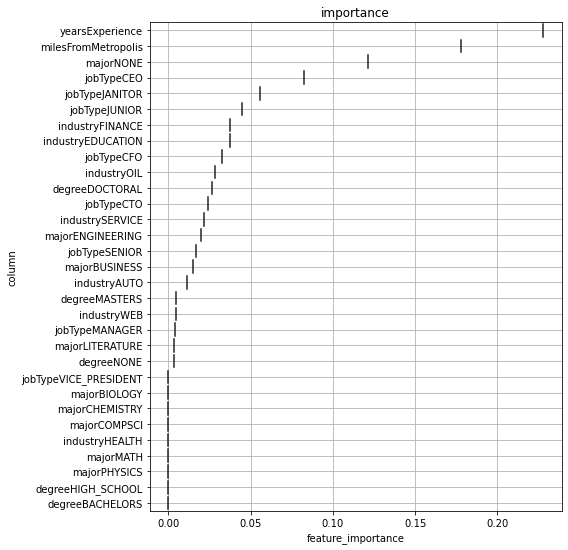

In [69]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
AdaBoost =AdaBoostRegressor() 
# Instantiate the model
AdaBoost.fit(X_train,Y_train)
# print score of the model
print_score(AdaBoost)
# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_,train_X)
# visualizing the importance of features.

# XGBoost
XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [201]:
!pip install xgboost

RMSE-Train: 18.789694764554035
RMSE-Test: 18.905195238395823
Score-Train: 0.7621539465759343
Score-Test: 0.7583005669243044
MedAE-Train: 13.335601806640625
MedAE-Test: 13.38534164428711
MeanAE-Train: 15.270667837957562
MeanAE-Test: 15.351373286637068 

Wall time: 32.2 s


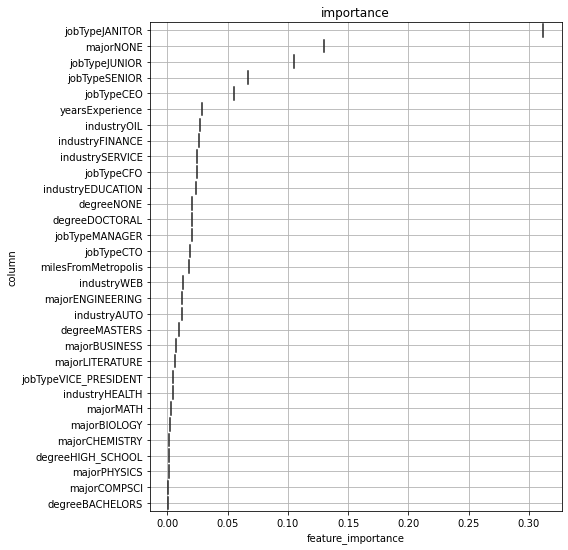

In [70]:
%%time
# Fit a XGB Regressor model to the train dataset
# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
xgbr =XGBRegressor()
# Fit the model to the data
xgbr.fit(X_train,Y_train)
# print score of the model
print_score(xgbr)
# visualizing the inportance of features.
fig, ax =visualize_importance(xgbr.feature_importances_,train_X) 


# Comparing all the model based on metric

In [71]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
        return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
        y_pred= model.predict(X_test) # then predict on the test set
        res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
        df_train[name] = [res[0], res[2], res[4], res[6]]
        df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [73]:
# list of models object
# list of models name
models= [lModel, DTR, rf, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

In [74]:
print(comp_model_train[:1])
print('/n')
print(comp_model_test[:1])

  Metric         Lr     Dtree     Forest        GBR     Xboost   AdaBoost
0   rmse  19.636871  8.361707  10.499288  19.395653  18.789695  25.669343
/n
  Metric         Lr      Dtree     Forest        GBR     Xboost   AdaBoost
0   rmse  19.587454  26.260833  21.031471  19.382471  18.905195  25.679825


In [75]:
comp_model_test

Metric         Lr      Dtree     Forest        GBR     Xboost   AdaBoost
0       rmse  19.587454  26.260833  21.031471  19.382471  18.905195  25.679825
1      MedAE  13.724365  16.000000  14.070000  13.637008  13.385342  19.609864
2        MAE  15.835112  20.364592  16.741962  15.661672  15.351373  21.380964
3  R-squared   0.649803   0.527461   0.634146   0.608500   0.683058   0.135830

In [76]:
test_x=test_data

In [77]:
test_x

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [78]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_x = scale_data(test_x,col_test)


In [79]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = test_x.drop(['jobType','degree','major','industry'],axis=1)
test_x = encoder.fit_transform(test_x.drop(['yearsExperience','milesFromMetropolis'],axis=1))

test_x = test_x.join(test_drop['yearsExperience'])
test_x = test_x.join(test_drop['milesFromMetropolis'])

In [80]:
test_x.head()

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  
1         0.833333             0.474747  
2         0.708333             0.090909  
3         0.583333             0.969697  
4         0.416667             0.444444  

[5 rows x 31 columns]

In [81]:
# Perforn the prediction on the test dataset
y_predicted = GBR.predict(test_x)
y_predicted

array([110.29771799,  95.85684989, 169.55518132, ...,  60.01983332,
       156.27246322, 112.91160731])

In [82]:
# creating a dataframe of predicted results 
predictions =pd.DataFrame(y_predicted)

In [83]:
predictions

0
0       110.297718
1        95.856850
2       169.555181
3       104.157629
4       117.429890
...            ...
999995  163.485852
999996  109.693187
999997   60.019833
999998  156.272463
999999  112.911607

[1000000 rows x 1 columns]

In [84]:
###  should be getting as the salary the personwe take same samples provided my the manager so that we can explain him the difference between the salary the person
sample =train_data.sample(100)
sample

jobType       degree       major industry  yearsExperience  \
60330              CFO      MASTERS     PHYSICS  FINANCE         0.916667   
441431             CTO     DOCTORAL  LITERATURE   HEALTH         0.791667   
512126             CFO  HIGH_SCHOOL        NONE     AUTO         0.750000   
337258          JUNIOR  HIGH_SCHOOL        NONE  SERVICE         0.000000   
708045          JUNIOR         NONE        NONE      WEB         0.208333   
...                ...          ...         ...      ...              ...   
692112         JANITOR  HIGH_SCHOOL        NONE      OIL         0.791667   
879334         MANAGER    BACHELORS   CHEMISTRY      OIL         0.041667   
474849  VICE_PRESIDENT      MASTERS    BUSINESS      WEB         0.791667   
268482             CTO      MASTERS     BIOLOGY   HEALTH         0.291667   
505229          SENIOR      MASTERS   CHEMISTRY  SERVICE         0.958333   

        milesFromMetropolis  salary  
60330              0.585859     190  
441431             0.878788     126  
512126             0.111111     139  
337258             0.010101      46  
708045             0.424242      76  
...                     ...     ...  
692112             0.232323     138  
879334             0.919192     112  
474849             0.464646     129  
268482             0.020202     149  
505229             0.828283     110  

[100 rows x 7 columns]

In [85]:
train_cat = sample.iloc[:,0:4]   #categorical variables for sample
#encodind the samples
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_cat)
#processing the sample data
train = train_X.join(sample.iloc[:,4:])
#taking those samples whose salary is very less i.e the reason for employee resigning
sample = train[train['salary']<60]
#Preparing the x and y values
x_sample = sample.drop('salary',axis=1)
y_sample = sample['salary']
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = scale_data(x_sample,col_test)
sample_x

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
337258         0.0         0.0         0.0             0.0            1.0   
189245         0.0         0.0         0.0             1.0            0.0   
324327         0.0         0.0         0.0             1.0            0.0   
374666         0.0         0.0         0.0             0.0            1.0   
232464         0.0         0.0         0.0             1.0            0.0   
502260         0.0         0.0         0.0             0.0            1.0   
17333          0.0         0.0         0.0             1.0            0.0   

        jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
337258             0.0            0.0                    0.0              0.0   
189245             0.0            0.0                    0.0              0.0   
324327             0.0            0.0                    0.0              0.0   
374666             0.0            0.0                    0.0              0.0   
232464             0.0            0.0                    0.0              0.0   
502260             0.0            0.0                    0.0              0.0   
17333              0.0            0.0                    0.0              0.0   

        degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
337258             0.0  ...           0.0           0.0                0.0   
189245             0.0  ...           0.0           0.0                0.0   
324327             0.0  ...           0.0           0.0                0.0   
374666             0.0  ...           0.0           0.0                1.0   
232464             0.0  ...           0.0           0.0                0.0   
502260             0.0  ...           0.0           0.0                0.0   
17333              0.0  ...           0.0           0.0                0.0   

        industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  \
337258              0.0             0.0          0.0              1.0   
189245              0.0             1.0          0.0              0.0   
324327              0.0             0.0          0.0              0.0   
374666              0.0             0.0          0.0              0.0   
232464              0.0             0.0          0.0              1.0   
502260              0.0             0.0          0.0              1.0   
17333               0.0             0.0          0.0              0.0   

        industryWEB  yearsExperience  milesFromMetropolis  
337258          0.0         0.000000             0.000000  
189245          0.0         1.000000             1.000000  
324327          1.0         0.363636             0.618557  
374666          0.0         0.363636             0.804124  
232464          0.0         0.363636             0.793814  
502260          0.0         0.090909             0.721649  
17333           1.0         0.272727             0.731959  

[7 rows x 31 columns]

In [86]:
#predicting the sample
predicted_out = xgbr.predict(sample_x) 
predicted_out

array([58.920734, 61.1461  , 62.769325, 48.6795  , 42.86435 , 52.101852,
       59.41509 ], dtype=float32)

In [87]:
#predicting the sample
predicted_out = GBR.predict(sample_x) 
predicted_out

array([63.52011756, 64.30207254, 66.74714516, 51.50332905, 48.13256428,
       55.07091254, 63.09823708])

In [88]:
y_sample #real values

337258    46
189245    34
324327    40
374666    43
232464    40
502260    54
17333     49
Name: salary, dtype: int64

# Insights:

1.Major employee of your company are not happy with the salary they are being provided..even if they have the required skills to do the job as compared to other competitors.

2.The employee living in the metro cities are satisfied with the salaries they are receiving...but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.

# solution:
    
1)Either increase the salary of these employee's(if they have the required degree and major)

2)Provide accomodation to people living in places far from city so that they are satisfied.

3)provide appraisal or some token of appreciation to such employee's